In [40]:
#Darts for Time series analysis and Forecast using NBEATS Model

In [4]:
AirPassengersDataset().load().head(4)

<TimeSeries (DataArray) (Month: 4, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1949-04-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [5]:
MonthlyMilkDataset().load().head(4)

<TimeSeries (DataArray) (Month: 4, component: 1, sample: 1)>
array([[[589.]],

       [[561.]],

       [[640.]],

       [[656.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1962-01-01 1962-02-01 ... 1962-04-01
  * component  (component) object 'Pounds per cow'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [6]:
import matplotlib.pyplot as plt

In [7]:
dataset1 = AirPassengersDataset().load() #optionally, both can use converted to pd dataframe
dataset2 = MonthlyMilkDataset().load()

Text(0.5, 1.0, 'Original Data')

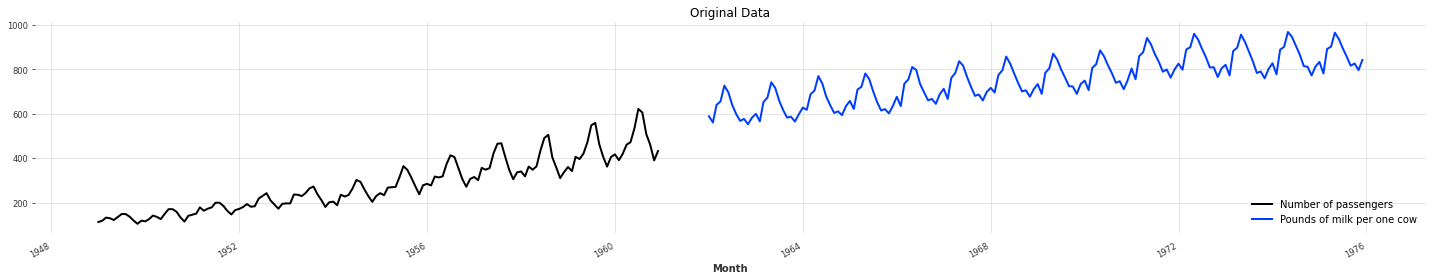

In [45]:
#plotting existing data 

dataset1.plot(label='Number of passengers') 
dataset2.plot(label='Pounds of milk per one cow')
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (20,4)
plt.legend(loc='lower right')
plt.title("Original Data")



Text(0.5, 1.0, 'Scaled Data')

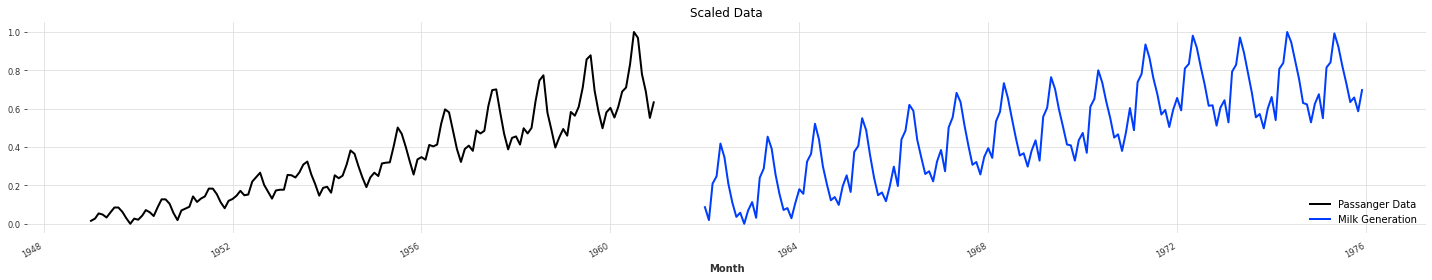

In [47]:
#scaling the data and fitting

from darts.dataprocessing.transformers import Scaler

dataset1_scaling, datase2_scaling = Scaler(), Scaler()
dataset1_inScale = dataset1_scaling.fit_transform(dataset1)
dataset2_inScale = datase2_scaling.fit_transform(dataset2)

dataset1_inScale.plot(label='Passanger Data')
dataset2_inScale.plot(label='Milk Generation')
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (20,4)
plt.legend(loc='lower right')
plt.title("Scaled Data")


In [29]:
# Train test Splitting
dataset1_Training, val_passanger = dataset1_inScale[:-28], dataset1_inScale[-28:]
dataset2_Training, val_milkGeneration = dataset2_inScale[:-28], dataset2_inScale[-28:]

In [48]:
from darts import TimeSeries

from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries

from darts.models import NBEATSModel

from darts.metrics import mape, smape

In [31]:
#Using NBEATS model for training the model

Gen_model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)  #first 24 months as training data in every epoch
Gen_model.fit([dataset1_Training, dataset2_Training], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE = 6.78%


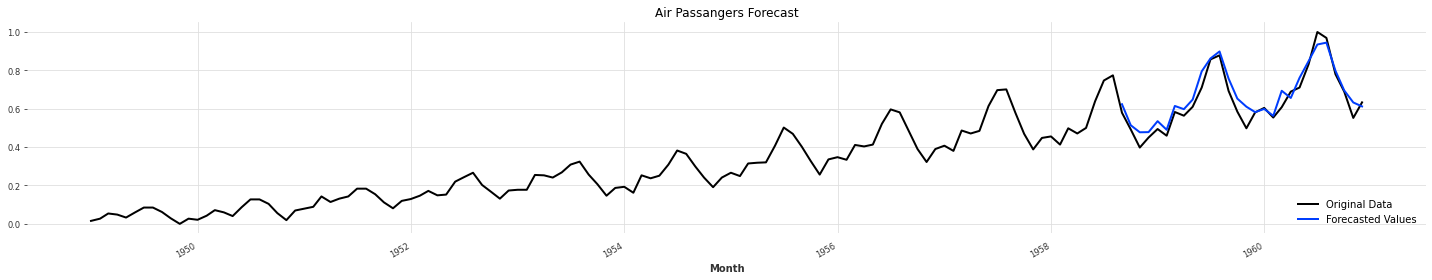

In [43]:
#Forecast for air passanger data

forecasting = Gen_model.predict(n=28, series=dataset1_Training)

dataset1_inScale.plot(label='Original Data')
forecasting.plot(label='Forecasted Values')

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (20,4)
plt.legend(loc='lower right')
plt.title("Air Passangers Forecast")


print('MAPE = {:.2f}%'.format(mape(dataset1_inScale, forecasting)))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MAPE = 6.16%


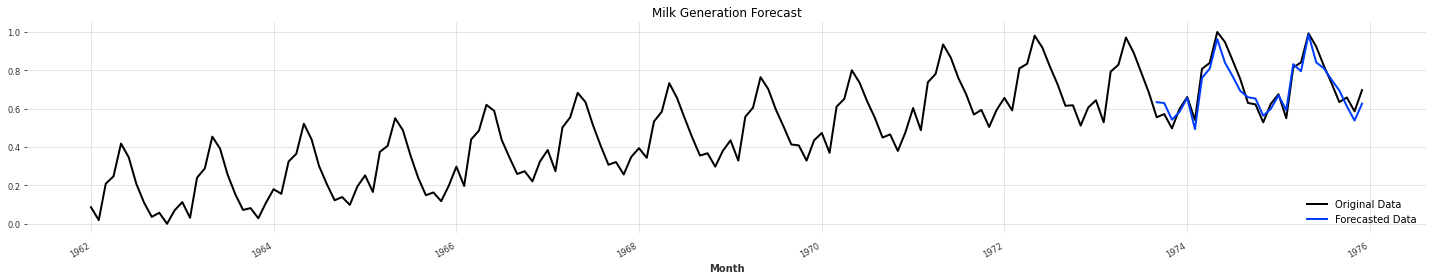

In [42]:
#Forecast for milk generation


forecasting2 = Gen_model.predict(n=28, series=dataset2_Training)

dataset2_inScale.plot(label='Original Data')
forecasting2.plot(label='Forecasted Data')

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (20,4)
plt.legend(loc='lower right')
plt.title("Milk Generation Forecast")

print('MAPE = {:.2f}%'.format(mape(dataset2_inScale, forecasting2)))

In [41]:
#Ashutosh Mahajan